In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

In [7]:
# 加载数据集
datas = pd.read_csv("./Data/movies_dataset.csv")

# 查看列属性
print(datas.columns)

print("************************")

# 数据的总体状况（类型，缺失）
datas.info()

# 检查缺失值个数
print("************************")
print(datas.isnull().sum())

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      19707 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        20547 non-null  object 
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20006 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  object 
 11  storyline        18847 non-null 

In [14]:
# 获取标称属性列名
nominal_columns = [ 'appropriate_for', 'director',  'id',
                   'industry', 'language', 'posted_date',
                   'release_date', 'run_time','storyline', 'title', 'writer']
# 分析标称属性
for col in nominal_columns:
    print(f'{col}属性的取值及出现次数：\n{datas[col].value_counts()}\n')

# 获取数值属性列名
numerical_columns = ['IMDb-rating', 'downloads', 'views', ]
numerical_datas = datas[numerical_columns]

# 处理脏数据
for e in range(1,3):
    for i, s in zip(range(len(datas[numerical_columns[e]])), datas[numerical_columns[e]]):
        if type(s) == str and s.__contains__(','):
            datas[numerical_columns[e]][i] = s.replace(',', '')
    datas[numerical_columns[e]] = datas[numerical_columns[e]].astype(float)

numerical_datas = datas[numerical_columns]

appropriate_for属性的取值及出现次数：
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

director属性的取值及出现次数：
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shiva

D:\Anaconda3\envs\data\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [15]:
# 计算每个数值属性的五数概括
# five_num_summary = numerical_datas.describe()
five_num_summary = numerical_datas.describe().T[['min', '25%', '50%', '75%', 'max']]
print(f'五数概括：\n{five_num_summary}')

# 计算每个数值属性的缺失值个数
num_missing = numerical_datas.isnull().sum()
print(f'\n每个数值属性的缺失值个数：\n{num_missing}')

五数概括：
               min     25%      50%      75%        max
IMDb-rating    1.1     4.8      5.7      6.6        9.9
downloads      0.0   855.5   2716.0  10070.0   391272.0
views        667.0  7571.5  15222.0  36571.0  1638533.0

每个数值属性的缺失值个数：
IMDb-rating    841
downloads        1
views            1
dtype: int64


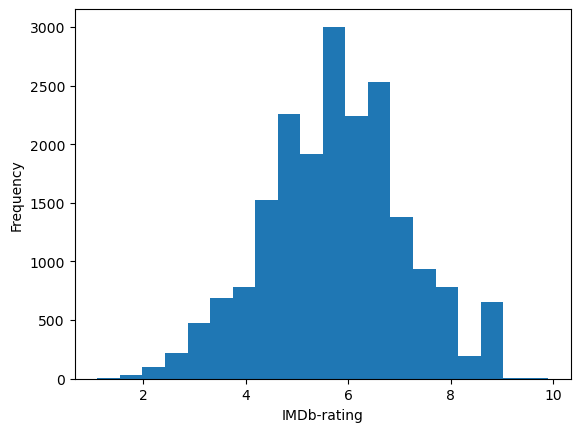

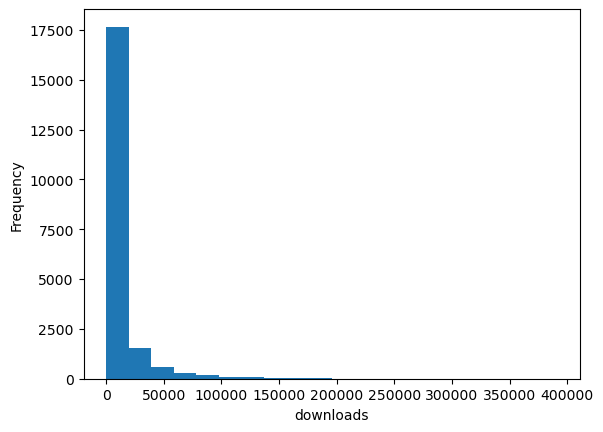

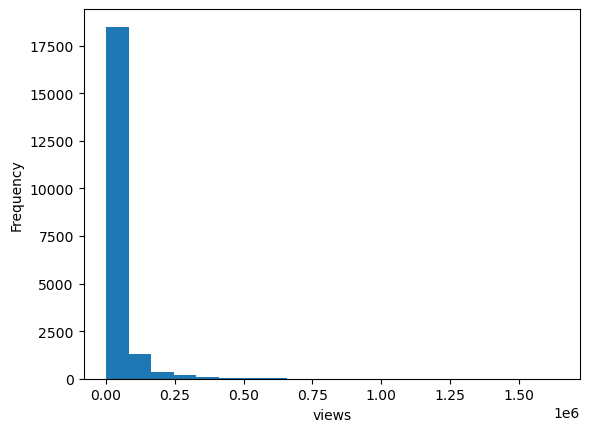

In [16]:
# 绘制直方图
for col in numerical_columns:
    plt.hist(datas[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

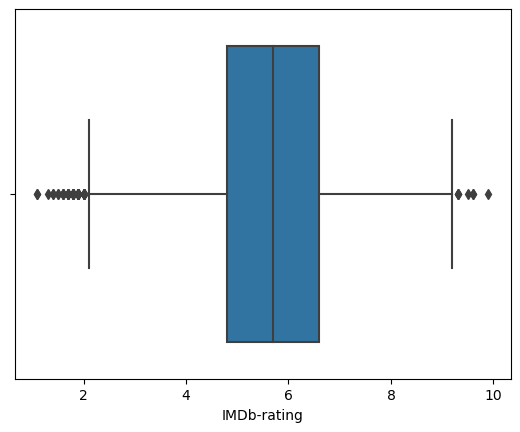

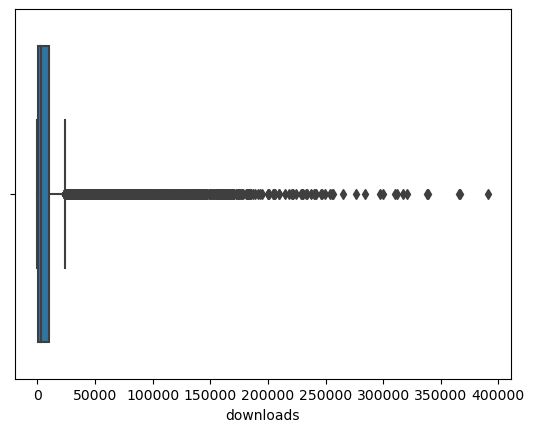

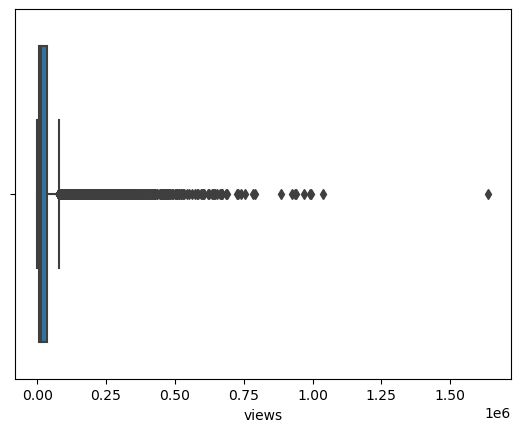

In [17]:
# 绘制盒图
for col in numerical_columns:
    sns.boxplot(x=datas[col])
    plt.xlabel(col)
    plt.show()

In [18]:
# 数据缺失处理
# 检查缺失值情况
print(datas.isnull().sum())

Unnamed: 0            0
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64


In [19]:
'''
此处您可以选择用如下四种方法之一来处理确实数据:
1.将缺失部分剔除
2.用最高频率值来填补缺失值
3.通过属性的相关关系来填补缺失值
4.通过数据对象之间的相似性来填补缺失值
'''

ndatas = datas
# 将缺失值剔除
ndatas_dropna = ndatas.dropna()

# 输出处理后的数据集信息
print('处理前数据集形状：', ndatas.shape)
print('处理后数据集形状：', ndatas_dropna.shape)
    

处理前数据集形状： (20548, 15)
处理后数据集形状： (9902, 15)


In [20]:

# 用众数填补缺失值
mdatas = datas
mdatas.fillna(mdatas.mode().iloc[0], inplace=True)

# 再次查看缺失值情况
print(mdatas.isnull().sum())


Unnamed: 0         0
IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64


In [33]:

# 计算属性相关性
corr_matrix = datas.corr()
# 输出相关性矩阵
print(corr_matrix)

ndatas = datas

# 先用众数补全'views'
mode_Low_Confidence_Limit = ndatas['views'].mode()[0]
ndatas['views'].fillna(mode_Low_Confidence_Limit, inplace=True)

# 再次查看缺失值情况
print(ndatas.isnull().sum())

# 选取一些与目标特征有一定相关性的特征作为自变量
corr_attributes = ['views']
xdatas = ndatas

# 构建预测模型
lr = LinearRegression()
train_data = xdatas[xdatas['downloads'].notnull()]
test_data = xdatas[xdatas['downloads'].isnull()]
X_train = train_data[corr_attributes]
y_train = train_data['downloads']
X_test = test_data[corr_attributes]
print("**************")
print(X_test)

lr.fit(X_train, y_train)
print("**************")
print(X_test.shape)
y_pred = lr.predict(X_test)

# 填充预测值
xdatas.loc[xdatas['downloads'].isnull(), 'downloads'] = y_pred
# 再次查看缺失值情况
print(xdatas.isnull().sum())


             Unnamed: 0  IMDb-rating  downloads        id     views
Unnamed: 0     1.000000     0.040640   0.158526 -0.829417  0.083820
IMDb-rating    0.040640     1.000000   0.068016  0.051660  0.057160
downloads      0.158526     0.068016   1.000000 -0.246679  0.947877
id            -0.829417     0.051660  -0.246679  1.000000 -0.183481
views          0.083820     0.057160   0.947877 -0.183481  1.000000
Unnamed: 0         0
IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64
**************
Empty DataFrame
Columns: [views]
Index: []
**************
(0, 1)


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [22]:

pdatas = datas
# 对这些列进行KNN填充
imputer = KNNImputer(n_neighbors=5)
pdatas[numerical_columns] = imputer.fit_transform(pdatas[numerical_columns])

# 再次查看缺失值情况
print(pdatas.isnull().sum())

Unnamed: 0         0
IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64
